# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [20]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [21]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [22]:
spaceship.shape

(8693, 14)

**Check for data types**

In [23]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [24]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [25]:
spaceship.dropna(inplace=True)

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [26]:

len(spaceship["Cabin"].unique())

5305

In [27]:
spaceship['cabin'] = spaceship['Cabin'].str[0]

In [28]:

print(spaceship[['Cabin', 'cabin']].head())


   Cabin cabin
0  B/0/P     B
1  F/0/S     F
2  A/0/S     A
3  A/0/S     A
4  F/1/S     F


In [30]:
spaceship.drop('Cabin', axis=1, inplace=True)

- Drop PassengerId and Name

In [31]:
spaceship.drop('Name', axis=1, inplace=True)
spaceship.drop("PassengerId" , axis=1, inplace=True)
spaceship.drop("cabin",axis=1, inplace= True)

- For non-numerical columns, do dummies.

In [33]:
columns_to_encode = ['HomePlanet', 'VIP', 'Destination', 'CryoSleep']

# Create dummies and drop the original columns
spaceship = pd.get_dummies(spaceship, columns=columns_to_encode, drop_first=True)

**Perform Train Test Split**

In [34]:
from sklearn.model_selection import train_test_split

# define target and features
X = spaceship.drop(['Spa'], axis=1)  # Features
y = spaceship['Spa']  # Target


# 30% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,)


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

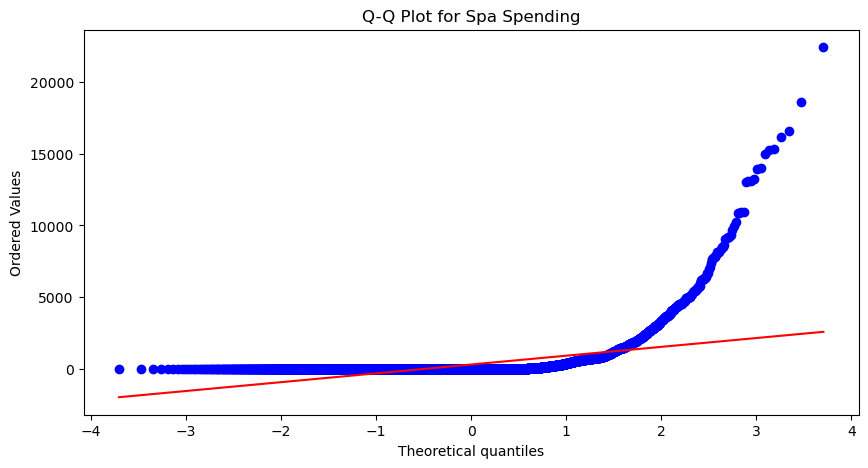

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot


# Q-Q Plot for Spa column
plt.figure(figsize=(10, 5))
probplot(spaceship['Spa'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Spa Spending')
plt.show()


In [36]:
# statistics for Spa
print(spaceship['Spa'].describe())


count     6606.000000
mean       313.161520
std       1144.016291
min          0.000000
25%          0.000000
50%          0.000000
75%         65.000000
max      22408.000000
Name: Spa, dtype: float64


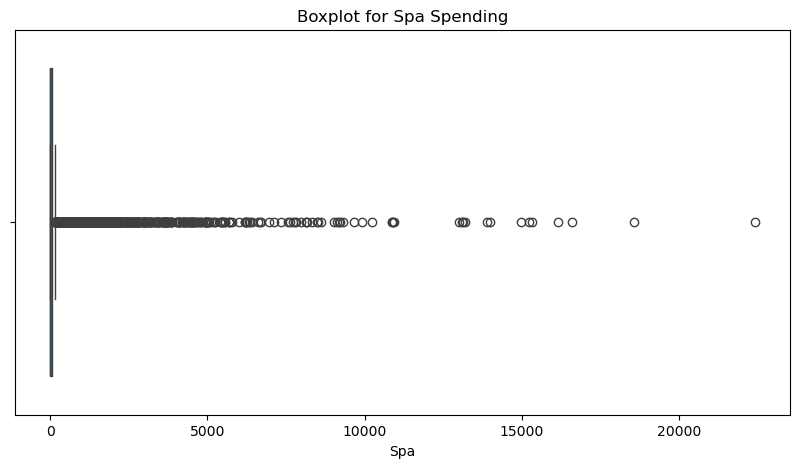

Number of Outliers: 125
Outliers:
          Spa
2      6715.0
154   14970.0
232    8620.0
336    5132.0
358    8157.0
...       ...
8097   5775.0
8264   4016.0
8265   4502.0
8459  13995.0
8567   3761.0

[125 rows x 1 columns]


In [37]:
from scipy.stats import zscore

# Boxplot for Spa
plt.figure(figsize=(10, 5))
sns.boxplot(x=spaceship['Spa'])
plt.title('Boxplot for Spa Spending')
plt.show()

# Z-score Analysis
# Calculate z-scores
z_scores = zscore(spaceship['Spa'])
outliers = spaceship[np.abs(z_scores) > 3]  # Threshold of 3 for extreme outliers

print(f"Number of Outliers: {len(outliers)}")
print("Outliers:")
print(outliers[['Spa']])

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Define Segments
def segment_spa(value):
    if value == 0:
        return "No Spending"
    elif 0 < value <= 500:
        return "Low-End"
    elif 501 <= value <= 2000:
        return "Mid-Range"
    elif 2001 <= value <= 5000:
        return "Premium"
    elif 5001 <= value <= 10000:
        return "Premium Plus"
    else:
        return "High-End"

# Apply Segmentation
spaceship['Segment'] = spaceship['Spa'].apply(segment_spa)


In [39]:


# Define Scalers for each segment
scaler_dict = {
    "No Spending": None,         
    "Low-End": MinMaxScaler(),
    "Mid-Range": MinMaxScaler(),
    "Premium": StandardScaler(),
    "Premium Plus": StandardScaler(),
    "High-End": RobustScaler()
}


In [40]:

# Apply Independent Scaling
scaled_spa = []

for segment in spaceship['Segment'].unique():
    # Extract segment data
    segment_data = spaceship[spaceship['Segment'] == segment]['Spa'].values.reshape(-1, 1)
    
    # Get appropriate scaler
    scaler = scaler_dict[segment]
    
    if scaler:
        
        scaled_data = scaler.fit_transform(segment_data)
        scaled_spa.extend(scaled_data.flatten())
    else:
        # If no scaling is applied, keep original values
        scaled_spa.extend(segment_data.flatten())

# Assign scaled values back to the dataset
spaceship['Spa_Scaled'] = scaled_spa

# Display the first few rows
print(spaceship.head())


    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  \
0  39.0          0.0        0.0           0.0     0.0     0.0        False   
1  24.0        109.0        9.0          25.0   549.0    44.0         True   
2  58.0         43.0     3576.0           0.0  6715.0    49.0        False   
3  33.0          0.0     1283.0         371.0  3329.0   193.0        False   
4  16.0        303.0       70.0         151.0   565.0     2.0         True   

   HomePlanet_Europa  HomePlanet_Mars  VIP_True  Destination_PSO J318.5-22  \
0               True            False     False                      False   
1              False            False     False                      False   
2               True            False      True                      False   
3               True            False     False                      False   
4              False            False     False                      False   

   Destination_TRAPPIST-1e  CryoSleep_True       Segment  Spa_

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Features and Target
X = spaceship.drop(['Spa', 'Spa_Scaled', 'Segment'], axis=1)  
y = spaceship['Spa_Scaled']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize and Train KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=9)
knn_model.fit(X_train, y_train)

# Make Predictions
y_pred = knn_model.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: -0.1212317046379554


- Evaluate your model's performance. Comment it

In [ ]:
#your code here